In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rc



In [106]:
os.listdir('outputs')
def get_data_list(metric,day,data_source,cols=['0']):
    data = pd.DataFrame(columns = cols+['graph'])
    for f in os.listdir('outputs'):
        if metric in f and day in f and data_source in f:
            df = pd.read_csv('outputs/'+f,index_col=0)
            df = pd.DataFrame(np.abs(df.values),columns=df.columns)
            df['graph'] = f.replace(metric+'_'+day,'').replace(data_source+'.csv','')
            data = data.append(df)
            
    return data
cols = ['TRM','Local Ratio','GHS','RHS','TRHS']
rtwkcp_df = get_data_list('runtimes','weekend','capital',cols).set_index('graph')
rtwdcp_df = get_data_list('runtimes','weekday','capital',cols).set_index('graph')
sdwkcp = get_data_list('sdists','weekend','capital').set_index('graph')
sdwdcp = get_data_list('sdists','weekday','capital').set_index('graph')
scwkcp_df = get_data_list('scores','weekend','capital',cols).set_index('graph')
scwdcp_df = get_data_list('scores','weekday','capital',cols).set_index('graph')
gswkcp = get_data_list('graphs','weekend','capital').set_index('graph')
gswdcp = get_data_list('graphs','weekday','capital').set_index('graph')





rtwkcp_avg = rtwkcp_df.mean()
rtwdcp_avg = rtwdcp_df.mean()
sdwkcp_avg = sdwkcp.mean()
sdwdcp_avg = sdwdcp.mean()
scwkcp_avg = scwkcp_df.mean()
scwdcp_avg = scwdcp_df.mean()
gswdcp_avg = gswdcp.mean()
gswkcp_avg = gswkcp.mean()
dtwkcp_avg = scwkcp_avg.values - sdwkcp_avg.values[0]



rtwkci_df = get_data_list('runtimes','weekend','citi',cols).set_index('graph')
rtwdci_df = get_data_list('runtimes','weekday','citi',cols).set_index('graph')
sdwkci = get_data_list('sdists','weekend','citi').set_index('graph')
sdwdci = get_data_list('sdists','weekday','citi').set_index('graph')
scwkci_df = get_data_list('scores','weekend','citi',cols).set_index('graph')
scwdci_df = get_data_list('scores','weekday','citi',cols).set_index('graph')
gswkci = get_data_list('graphs','weekend','citi').set_index('graph')
gswdci = get_data_list('graphs','weekday','citi').set_index('graph')

rtwkci_avg = rtwkci_df.mean()
rtwdci_avg = rtwdci_df.mean()
sdwkci_avg = sdwkci.mean()
sdwdci_avg = sdwdci.mean()
scwkci_avg = scwkci_df.mean()
scwdci_avg = scwdci_df.mean()
gswdci_avg = gswdci.mean()
gswkci_avg = gswkci.mean()




In [107]:
sdwkcp_avg.values[0],sdwdcp_avg.values[0],sdwkci_avg.values[0],sdwdci_avg.values[0]

(74392.48812139714, 86927.02102063062, 54471.101562136915, 57587.53691999826)

<ipython-input-108-89b0054493ab>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+list(scwkcp_avg.index))


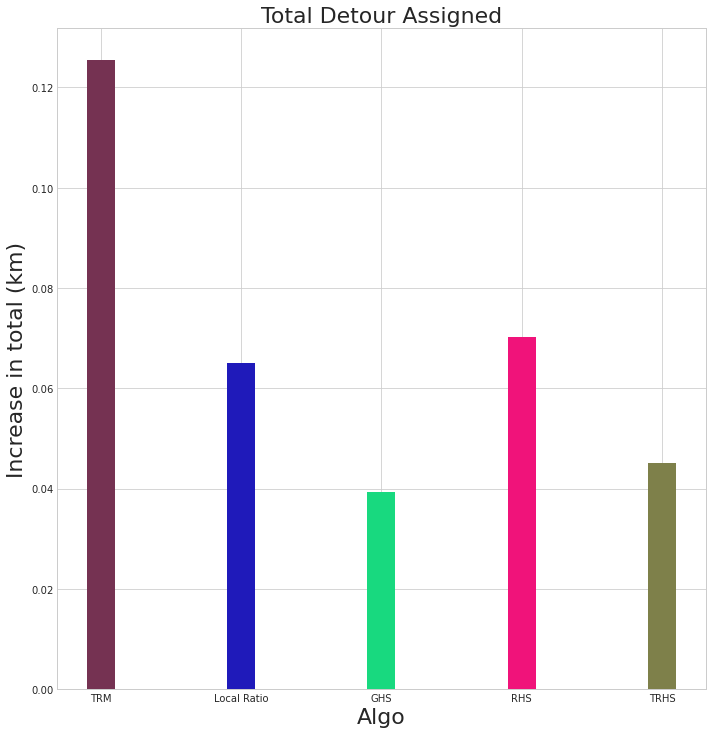

In [108]:
font = {'size'   : 22}
plt.style.use('seaborn-whitegrid')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})


width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects = []
colors = ['#753252','#1f1aba','#18d97f','#f0137a','#7e804a']
ax.bar(range(len(scwdcp_avg)),  (scwdcp_avg.values - sdwdcp_avg.values)/sdwdcp_avg.values, width, color=colors)
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Increase in total (km)',**font)
ax.set_xlabel('Algo',**font)
ax.set_xticklabels(['']+list(scwkcp_avg.index))
#for rect in rects:
#    ax.bar_label(rect, padding=15)
fig.set_size_inches(10, 10)

fig.tight_layout()
plt.title('Total Detour Assigned', **font
         )
plt.show()

<ipython-input-109-12711903a267>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+list(scwkcp_avg.index))


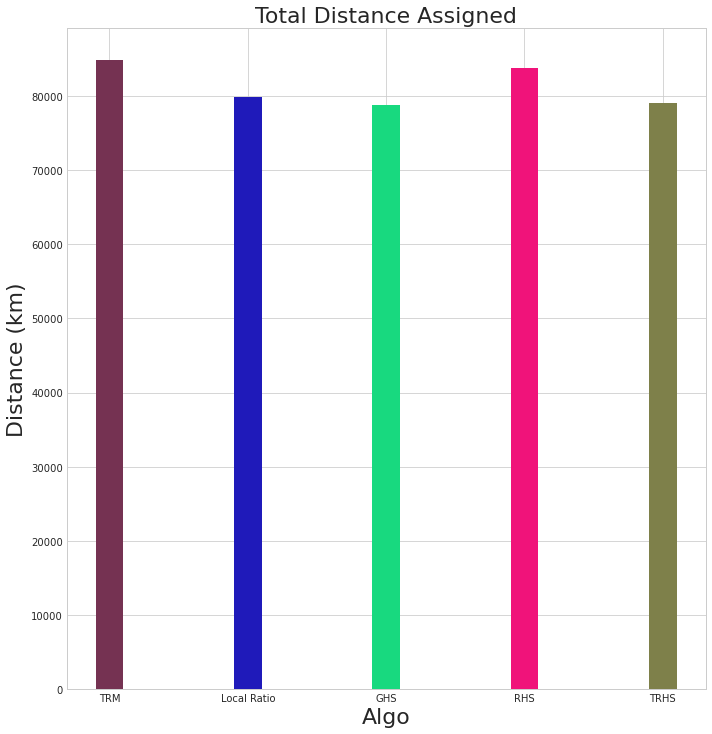

In [109]:
font = {'size'   : 22}
plt.style.use('seaborn-whitegrid')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})


width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects = []
colors = ['#753252','#1f1aba','#18d97f','#f0137a','#7e804a']
ax.bar(range(len(scwkcp_avg)),  scwkcp_avg.values , width, color=colors)
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Distance (km)',**font)
ax.set_xlabel('Algo',**font)
ax.set_xticklabels(['']+list(scwkcp_avg.index))
#for rect in rects:
#    ax.bar_label(rect, padding=15)
fig.set_size_inches(10, 10)

fig.tight_layout()
plt.title('Total Distance Assigned', **font
         )
plt.show()

In [112]:
results ={'Weekday':(scwdci_avg.values - sdwdci_avg.values)/sdwdci_avg.values,
         'Weekend':(scwkci_avg.values - sdwkci_avg.values)/sdwkci_avg.values}
#results ={'Weekday':rtwdci_avg.values,
#         'Weekend':rtwkci_avg.values}



In [113]:
print(pd.DataFrame(results.values(),index=results.keys(),columns = scwdcp_avg.index).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &       TRM &  Local Ratio &       GHS &       RHS &      TRHS \\
\midrule
Weekday &  0.107884 &     0.017786 &  0.019964 &  0.061154 &  0.027110 \\
Weekend &  0.121103 &     0.040869 &  0.025730 &  0.066391 &  0.036254 \\
\bottomrule
\end{tabular}



In [102]:
scwdcp_avg.values, sdwdcp_avg.values

(array([97836.35009165, 92589.00989732, 90339.79433264, 93033.3244081 ,
        90845.28621157]),
 array([226.47619048]))

In [103]:
sdwdcp

,0
graph,
39,247
12,117
25,153
56,326
34,304
28,227
53,187
7,84
20,323
